In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

janjun = pd.read_csv("uber-traffic/uber-raw-data-janjune-15.csv")
janjun

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45


In [2]:
janjun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [3]:
janjun.isnull().sum()

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     162195
locationID                   0
dtype: int64

In [4]:
janjun.fillna(0, inplace=True)

In [5]:
janjun.isnull().sum()

Dispatching_base_num    0
Pickup_date             0
Affiliated_base_num     0
locationID              0
dtype: int64

No 1 & 2

In [6]:
print(janjun["Pickup_date"].max())
print(janjun["Pickup_date"].min())

2015-06-30 23:59:00
2015-01-01 00:00:05


No 3

In [7]:
janjun["Pickup_date"] = pd.to_datetime(janjun["Pickup_date"])
janjun["nama_hari"] = janjun["Pickup_date"].dt.day_name()
janjun["tanggal"] = janjun["Pickup_date"].dt.day
janjun["menit"] = janjun["Pickup_date"].dt.minute
janjun["bulan"] = janjun["Pickup_date"].dt.month
janjun["jam"] = janjun["Pickup_date"].dt.hour
janjun["detik"] = janjun["Pickup_date"].dt.second

janjun

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,nama_hari,tanggal,menit,bulan,jam,detik
0,B02617,2015-05-17 09:47:00,B02617,141,Sunday,17,47,5,9,0
1,B02617,2015-05-17 09:47:00,B02617,65,Sunday,17,47,5,9,0
2,B02617,2015-05-17 09:47:00,B02617,100,Sunday,17,47,5,9,0
3,B02617,2015-05-17 09:47:00,B02774,80,Sunday,17,47,5,9,0
4,B02617,2015-05-17 09:47:00,B02617,90,Sunday,17,47,5,9,0
...,...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,Friday,8,43,5,15,0
14270475,B02765,2015-05-08 15:43:00,B02765,263,Friday,8,43,5,15,0
14270476,B02765,2015-05-08 15:43:00,B02765,90,Friday,8,43,5,15,0
14270477,B02765,2015-05-08 15:44:00,B01899,45,Friday,8,44,5,15,0


No 4

<Axes: xlabel='bulan'>

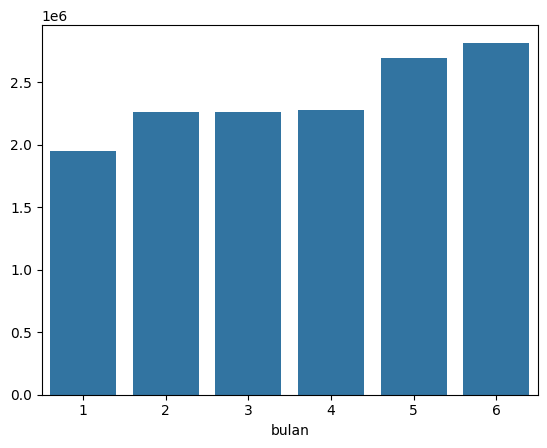

In [8]:
group = janjun.groupby("bulan")["bulan"].count()
sns.barplot(x = group.index, y = group.values)

No 5

<Axes: xlabel='jam'>

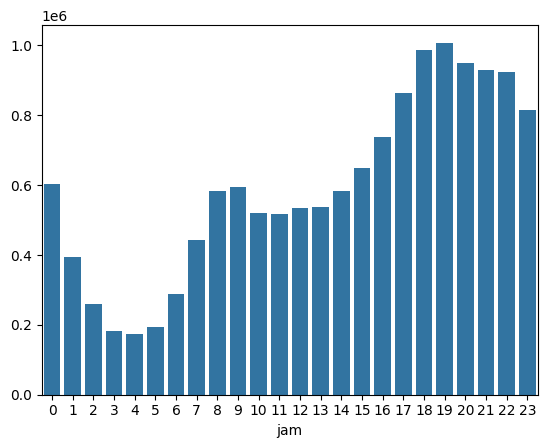

In [9]:
traffic = janjun.groupby("jam")["jam"].count()
sns.barplot(x = traffic.index, y = traffic.values)

In [10]:
janjun.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'nama_hari', 'tanggal', 'menit', 'bulan', 'jam', 'detik'],
      dtype='object')

No 6

<Axes: xlabel='jam', ylabel='locationID'>

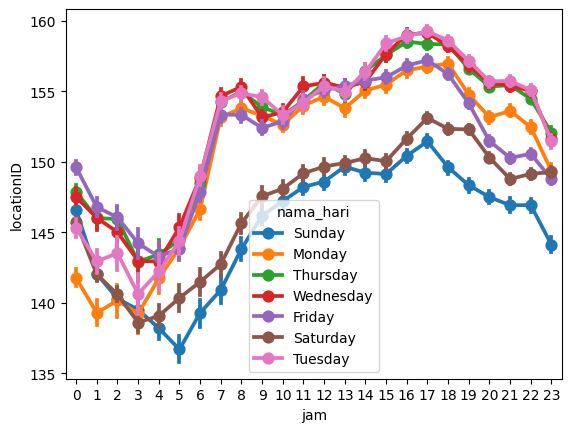

In [11]:
sns.pointplot(x = "jam", y = "locationID", hue = "nama_hari", data = janjun)

<Axes: xlabel='jam', ylabel='nama_hari'>

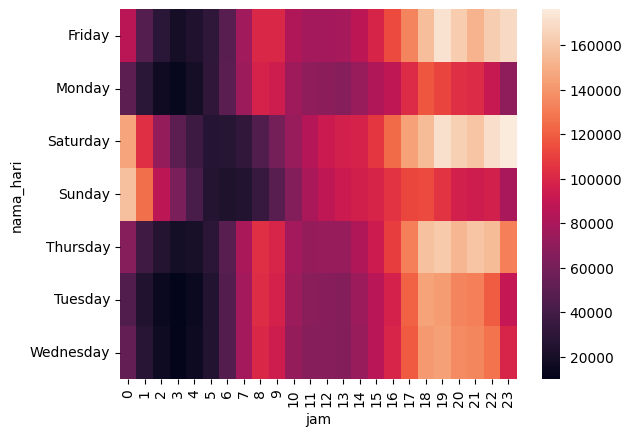

In [12]:
hari = janjun.groupby(["nama_hari", "jam"])["jam"].count()
pivot = hari.unstack()

sns.heatmap(pivot)

Assignment 2

In [13]:
janfeb = pd.read_csv("Uber-Jan-Feb-FOIL.csv")
janfeb

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


No 1

In [14]:
janfeb["dispatching_base_number"].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

No 2

Text(0, 0.5, 'Number of Active Vehicles')

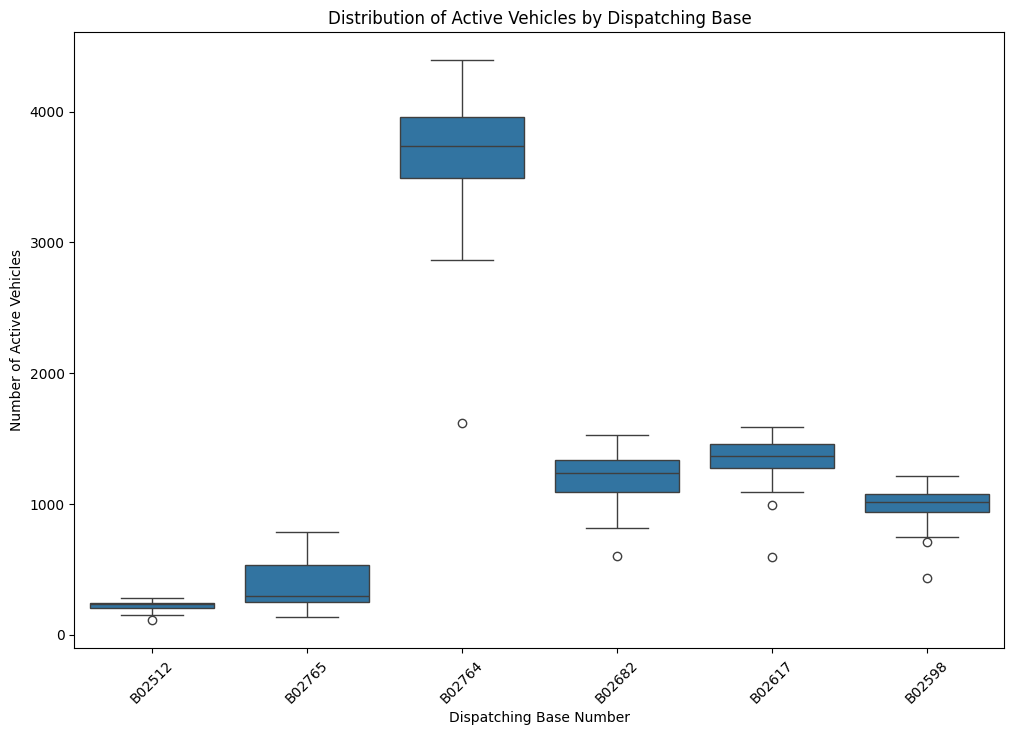

In [21]:
plt.figure(figsize=(12,8))

sns.boxplot(data=janfeb, x="dispatching_base_number", y="active_vehicles")
plt.xticks(rotation=45)
plt.title("Distribution of Active Vehicles by Dispatching Base")
plt.xlabel("Dispatching Base Number")
plt.ylabel("Number of Active Vehicles")

No 3

<Axes: xlabel='dispatching_base_number'>

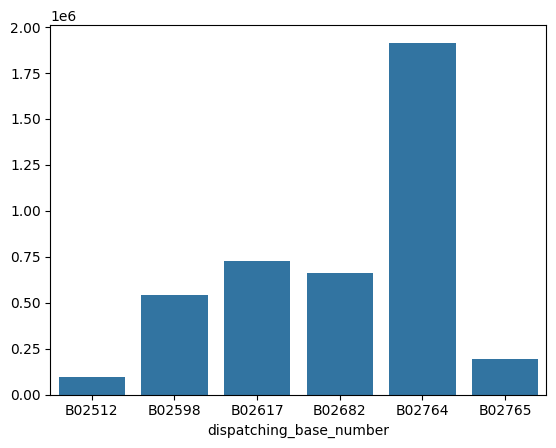

In [22]:
trip = janfeb.groupby("dispatching_base_number")["trips"].sum()
sns.barplot(x = trip.index, y = trip.values)

<Axes: xlabel='dispatching_base_number', ylabel='date'>

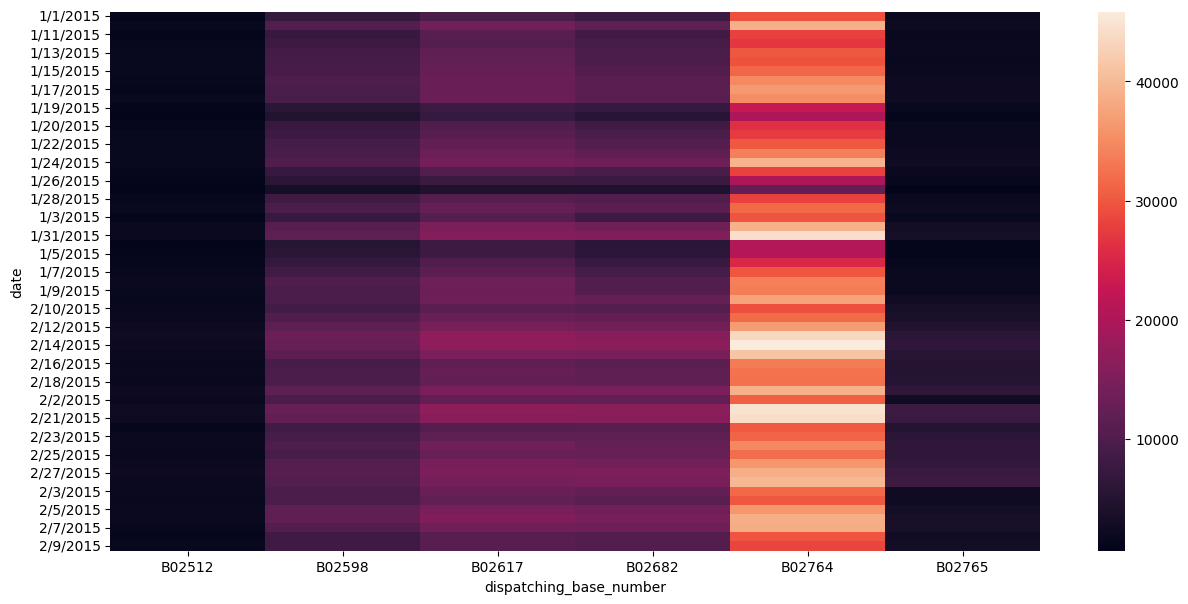

In [31]:
rata = janfeb.groupby(["date", "dispatching_base_number"])["trips"].mean()
pivot = rata.unstack()

plt.figure(figsize=(15,7))
sns.heatmap(pivot)